# Music genre classification

## Problem
Categorizing music files according to their genre is a challenging task in the area of music information retrieval (MIR). We want to build a model which is able to perform this task and than explore ways to explain the models decisions especially for music files which do not easily fit into one single genre.
## Dataset
The dataset used is FMA: A Dataset For Music Analysis.
https://github.com/mdeff/fma

Both preprocessed features like spectral_centroid, spectral_bandwidth and spectral_rolloff and raw audio files are available with this dataset, which is very handy.
## SVM
First simple SVM on the preprocessed features was used to have some baseline model.
With this model accuracy `0.46375` was achieved, this is most likely a result of very careful feature enginneering, which was already done by the dataset creators.

More info and metrics like confusion matrix, recall, precision and f1-score, can be found in the notebook with the model itself.
## Preprocessing
The raw audio files had to be processed with `librosa` library - they were converted to mel spectrograms and saved as npz files. Those files are still pretty huge, so they are saved on google drive, not in this repo.
## Google Colaboratory
As I did not want to go trough the trouble of setting up tensorflow environment which i wanted use to power keras, I went with Google Colaboratory which is an online jupyter notebook environment with free GPU attached.

Problem I had to solve was related to the size of the dataset which is not small, fortunately there is a python package which allowed me to mount google drive as and read the data from there.
## CRNN
Convolutional Neural Networks (CNNs) are commonly used in image recognition related tasks.
They perform convolution operation instead of matrix multiplication and are typically used in the
early layers for understanding the 2D layout of the data. On the other hand RNNs excel in understand
sequential data by making the hidden state at time t dependent on hidden state at time t-1. The
neural network that we have built here use 1D convolution layers that perform convolution operation
just across the time dimension. RELU activation is applied after the Convolution
operation. Batch normalization is done and finally 1D Max Pooling is performed which reduces
spatial dimension of the image and prevents over fitting.

This chain of operations - 1D Convolution - RELU - Batch Normalization - 1D Max Pooling is performed 3 times. The key parameters used
are: Kernel Size of 5 and 56 filters per layer. [1][4]


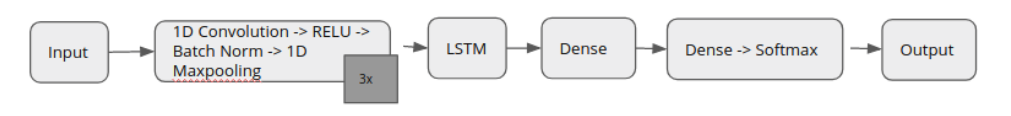



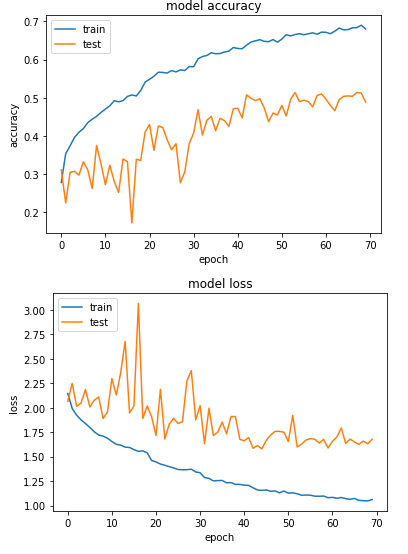

Accuracy achieved after 70 epochs of training was `0.48875` . That unfortunately is not much better than baseline models accuracy, but it is a small improvement.

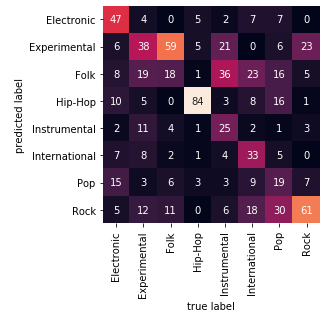

From confusion matrix we can see some genres are more likely to be mislabeled as other similar genres. More info and metrics like recall, precision and f1-score, can be found in the notebook with the model itself.

## Confusing the model

To confuse the model which is built with the assumption that every track fits exactly one single genre, I tried to pick some tracks which are not easily labeled even if human was to do it.

We move a sliding window of 30s across the track, usually resulting in cca 300-500 30s samples of the given track. We than try to classify each of the samples and plot the results in two different ways.

It was quite storage intensive to process those files, so only resulting csv with the classification results is present in the repository, rest can be downloaded from google drive link found in the readme.
### Absolute ratio plot 
This plot shows how ratio of detected genres changes over time.

### Sliding window ratio plot
This plot looks at last `n` classification results as time passes and ratio of detected genres is computed for each such window. 


### The Prodigy - Voodoo People
https://www.youtube.com/watch?v=-Fz85FE0KtQ

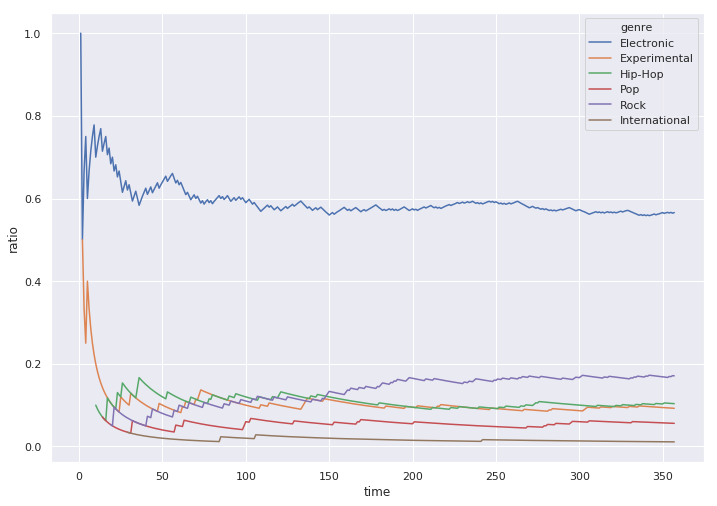

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("conf_csv/voodoo_people.npz.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

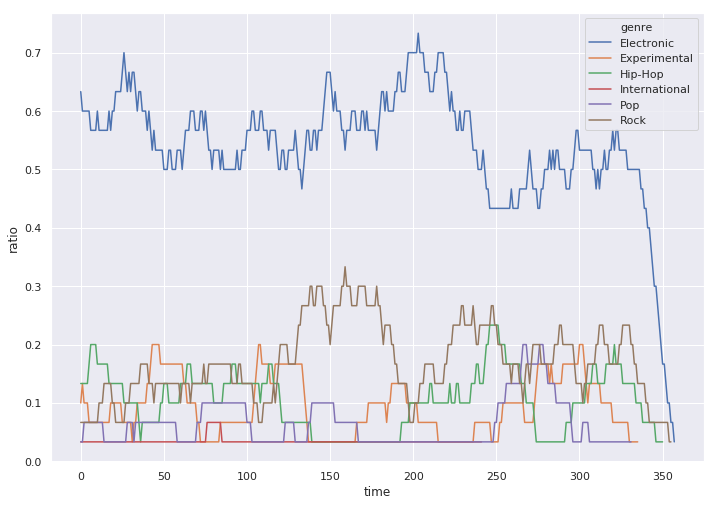

In [2]:
df = pd.read_csv("conf_csv/voodoo_people.npz_sliding.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

### FKY - Ragga 100
https://www.youtube.com/watch?v=XLAi3oyI1P0

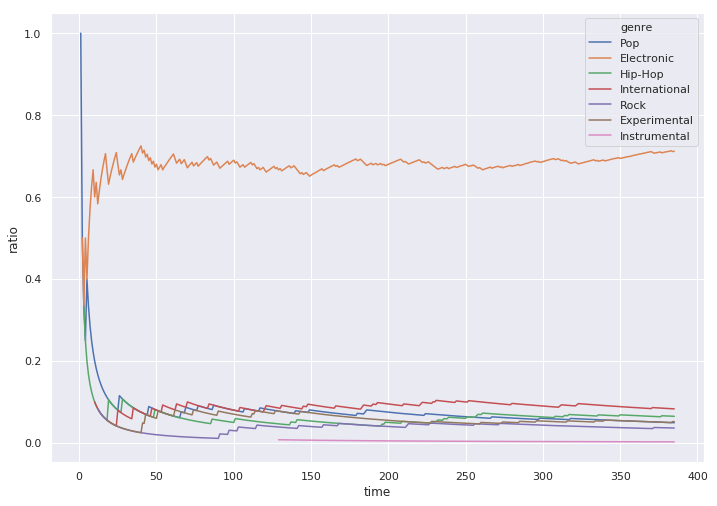

In [3]:
df = pd.read_csv("conf_csv/ragga100.npz.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

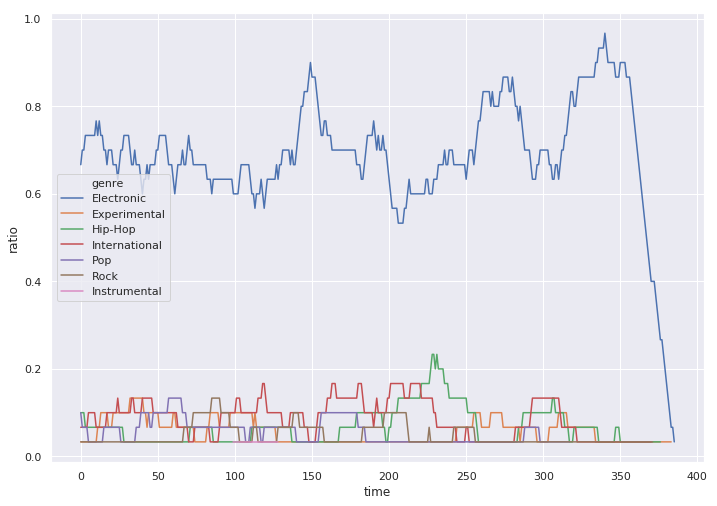

In [4]:
df = pd.read_csv("conf_csv/ragga100.npz_sliding.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

### Aphex Twin  - Ageispolis
https://www.youtube.com/watch?v=SfdPkM_VDVQ

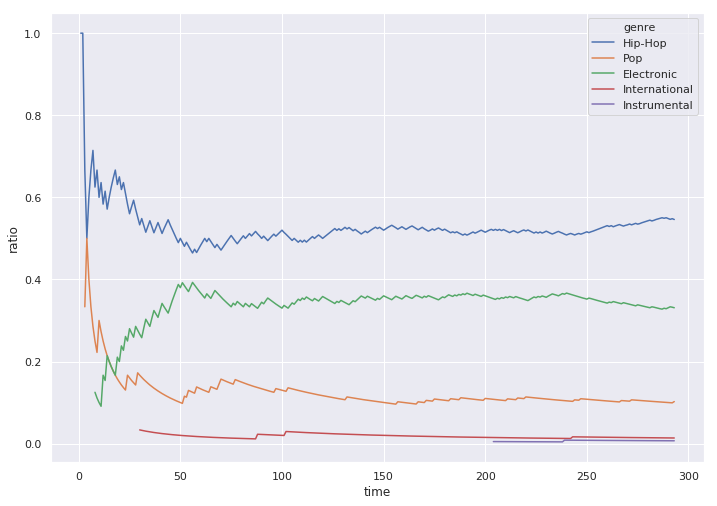

In [5]:
df = pd.read_csv("conf_csv/ageispolis.npz.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

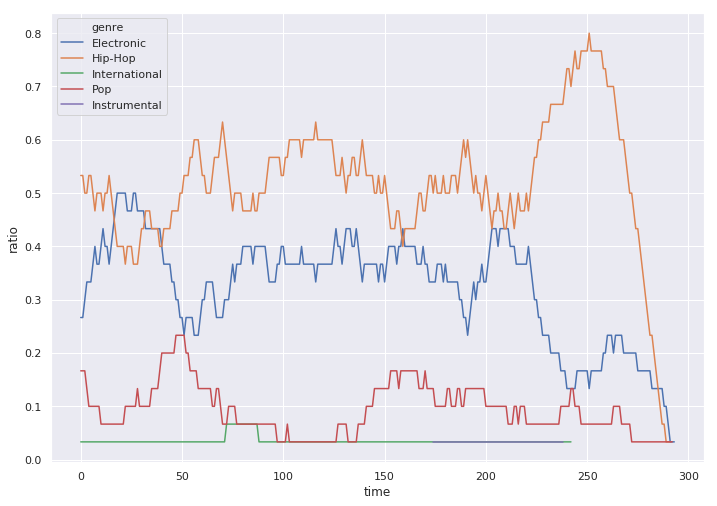

In [6]:
df = pd.read_csv("conf_csv/ageispolis.npz_sliding.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

### Zone-33 - Sound Of Da Police RMX
https://www.youtube.com/watch?v=-U2S224Amd4

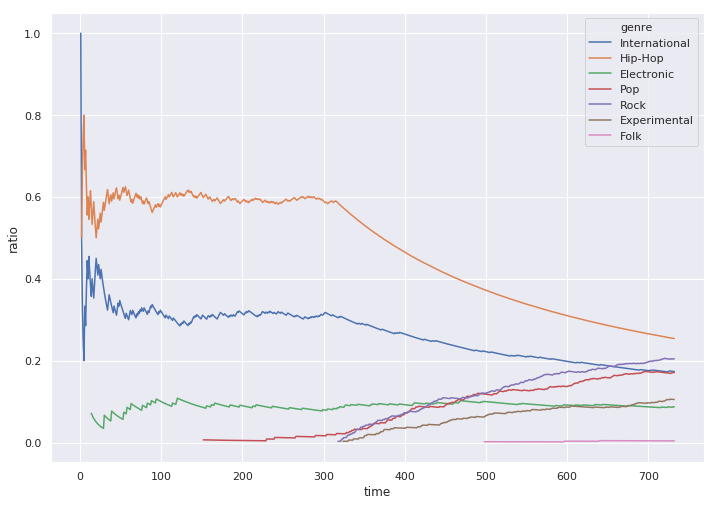

In [7]:
df = pd.read_csv("conf_csv/police.npz.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

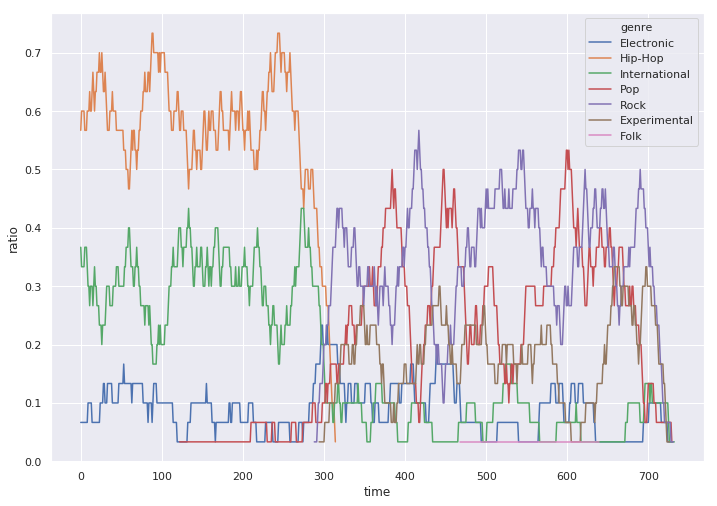

In [8]:
df = pd.read_csv("conf_csv/police.npz_sliding.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df,x='time', y='ratio', hue='genre')

##  Future work

We could try tons of other stuff to further explain the model. Some of those options are listed below, unfortunately none of them were actually implemented.

### What can we take from those visualisations
It seems that when using CRNN, it is very important where the track starts. Maybe we could try preprocessing the dataset with this in mind. 

One approach which could be worth exploring is using some kind of beat detection algorithm, and using its output to properly align the samples. The small FMA dataset is just trimmed to 30 seconds from the middle of the track if possible. [3] We could improve the process of trimming based on a beat grid and this could arguably lead to better accuracy of the model . Unfortunately the dataset of untrimmed tracks is 917GB in size and I am not able to confirm this theory at this moment. 

### Filter explainability

To explain the decisions made by the model we could try visualizing the convolution kernels, to see what are they focusing on. 

For keras there is a package called `keras-vis` avaialble which is able to produce.


 - Activation maximization
 - Saliency maps
 - Class activation maps
    
[6]

### Auralisation

An intresting paper about explaining deep convolutional neural networks has been published, which introduces an intresting concept of auralisation.

Auralisation of a CNN is converting the learned convolutional features that are obtained from deconvolution into audio signals. In the experiments and discussions, we explain trained features of a 5-layer CNN based on the deconvolved spectrograms and auralised signals. The pairwise correlations per layers with varying different musical attributes are also investigated to understand the evolution of the learnt features. It is shown that in the deep layers, the features are learnt to capture textures, the patterns of continuous distributions, rather than shapes of lines. [5]

Similar concept could probably be applied for further insight into the network.

## Sources


[1] Keunwoo Choi, George Fazekas, Mark Sandler, Kyunghyun Cho. Convolutional Recurrent Neural Net-
works for Music Classification. ArXiv 1609.04243

[2] Music Genre Classification with Python
A Guide to analysing Audio/Music signals in Python https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

[3]  FMA: A Dataset For Music Analysis https://arxiv.org/abs/1612.01840

[4] Using CNNs and RNNs for Music Genre Recognition
Doing cool things with data! https://towardsdatascience.com/using-cnns-and-rnns-for-music-genre-recognition-2435fb2ed6af

[5] Explaining Deep Convolutional Neural Networks on Music Classification https://arxiv.org/abs/1607.02444

[6] Keras Visualization Toolkit https://github.com/raghakot/keras-vis